In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

testing = pd.read_csv(r'C:\Users\phnth\Downloads\new_testing_data.csv')
training = pd.read_csv(r'C:\Users\phnth\Downloads\new_training_data.csv')

In [2]:
#PREPARING DATASET
X_train = training.drop('Loan Status', axis=1)  
y_train = training['Loan Status']
X_test = testing 

labelencoder_y=LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [3]:
#SCALING
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train_Scaled=SC.fit_transform(X_train)
X_test_Scaled=SC.fit_transform(X_test)

In [4]:
#TRAINING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# Initialize the LR Model 
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)

# Calculate the accuracy score 
from sklearn.model_selection import cross_val_score 
accuracy_lr = cross_val_score(estimator=logistic_regression, X=X_train, y=y_train, cv=10)
print(f"The accuracy of the Logistic Regression model is \t {accuracy_lr.mean()}")
print(f"The deviation in the accuracy of Logistic Regression model is \t {accuracy_lr.std()}")

The accuracy of the Logistic Regression model is 	 0.7867874657826123
The deviation in the accuracy of Logistic Regression model is 	 5.541816185047616e-05


In [5]:
#TRAINING KNN
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN Model 
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model 
knn.fit(X_train, y_train)

# Calculate the accuracy score 
accuracy_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
print(f"The accuracy of the KNN model is \t {accuracy_knn.mean()}")
print(f"The deviation in the accuracy of KNN model is \t {accuracy_knn.std()}")

The accuracy of the KNN model is 	 0.7465760504506473
The deviation in the accuracy of KNN model is 	 0.004741167747951971


In [6]:
#TRAINING SVM
from sklearn.svm import SVC
# Initialize the SVM Model 
svm = SVC()

# Train the model
svm.fit(X_train,y_train)

# Calculate the accuracy score 
accuracy_svm = cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10)
print(f"The accuracy of the SVM model is \t {accuracy_svm.mean()}")
print(f"The deviation in the accuracy of SVM model is \t {accuracy_svm.std()}")

The accuracy of the SVM model is 	 0.7868125284392539
The deviation in the accuracy of SVM model is 	 4.5179344785687504e-05


LQC ĐỂ PHẦN MODEL EVALUATION Ở ĐÂY 

In [11]:
#PREDICTION
y_pred = logistic_regression.predict(X_test_Scaled)
testing.to_csv('predictions.csv', index=False)
testing 


c:\Users\phnth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Cluster,Loan Status
0,611314.0,1,747.0,2074116.0,1.0,1,3,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,1,Charged Off
1,266662.0,1,734.0,1919190.0,1.0,1,3,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,1,Charged Off
2,153494.0,1,709.0,871112.0,2.0,3,3,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,3,Charged Off
3,176242.0,1,727.0,780083.0,1.0,3,3,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,0,Charged Off
4,321992.0,1,744.0,1761148.0,1.0,1,3,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1,Charged Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,157806.0,1,731.0,1514376.0,6.0,3,3,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0,3,Charged Off
9995,132550.0,1,718.0,763192.0,4.0,1,3,12401.87,9.9,8.0,0.0,74309.0,329692.0,0.0,0.0,3,Charged Off
9996,223212.0,0,747.0,853803.0,11.0,3,3,4354.42,27.2,8.0,1.0,99636.0,568370.0,1.0,0.0,0,Charged Off
9997,99999999.0,1,721.0,972097.0,1.0,1,3,12232.20,16.8,8.0,1.0,184984.0,240658.0,0.0,0.0,2,Charged Off


In [8]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(testing)

# Initialize K-Means with the desired number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the K-Means model to the data
kmeans.fit(data_scaled)

# Obtain cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Add cluster assignments to the original DataFrame
testing['Cluster'] = cluster_assignments

testing

c:\Users\phnth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Cluster
0,611314.0,1,747.0,2074116.0,1.0,1,3,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,1
1,266662.0,1,734.0,1919190.0,1.0,1,3,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,1
2,153494.0,1,709.0,871112.0,2.0,3,3,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,3
3,176242.0,1,727.0,780083.0,1.0,3,3,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,0
4,321992.0,1,744.0,1761148.0,1.0,1,3,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,157806.0,1,731.0,1514376.0,6.0,3,3,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0,3
9995,132550.0,1,718.0,763192.0,4.0,1,3,12401.87,9.9,8.0,0.0,74309.0,329692.0,0.0,0.0,3
9996,223212.0,0,747.0,853803.0,11.0,3,3,4354.42,27.2,8.0,1.0,99636.0,568370.0,1.0,0.0,0
9997,99999999.0,1,721.0,972097.0,1.0,1,3,12232.20,16.8,8.0,1.0,184984.0,240658.0,0.0,0.0,2


In [9]:
# Group the data by the 'Cluster' column
cluster_groups = testing.groupby('Cluster')

# Calculate mean for each cluster
cluster_means = cluster_groups.mean()

# Calculate median for each cluster
cluster_medians = cluster_groups.median()

# Calculate standard deviation for each cluster
cluster_std = cluster_groups.std()

from IPython.display import display

# Display the mean results
print("Mean:")
display(cluster_means)

# Display the median results
print("\nMedian:")
display(cluster_medians)

# Display the standard deviation results
print("\nStandard Deviation:")
display(cluster_std)

Mean:


,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Cluster,,,,,,,,,,,,,,,
0,1.109986e+07,0.753043,1036.803478,1.158262e+06,4.187826,1.938261,3.733043,15320.054887,19.876609,10.819130,1.261739,156711.025217,3.846473e+05,1.005217,0.192174
1,1.317279e+06,0.528215,972.953935,1.806371e+06,3.303647,1.416507,3.543570,30454.125712,21.506603,14.887524,0.027255,545850.431094,1.319302e+06,0.001919,0.016123
2,1.000000e+08,0.814213,726.271066,1.354057e+06,4.147208,1.893401,3.736041,17383.476914,18.272792,11.012183,0.021320,287247.844670,6.800957e+05,0.000000,0.009137
3,2.551055e+05,0.808138,1080.308614,1.007403e+06,4.353489,2.189960,3.882107,13350.972712,16.251150,9.271344,0.021297,194361.365279,4.415699e+05,0.000000,0.006845



Median:


,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Cluster,,,,,,,,,,,,,,,
0,245586.0,1.0,729.0,936985.0,3.0,2.0,3.0,14055.725,18.3,10.0,1.0,128155.0,329505.0,1.0,0.0
1,437756.0,1.0,729.0,1553288.0,2.0,1.0,3.0,27903.020,20.0,14.0,0.0,419767.0,875292.0,0.0,0.0
2,99999999.0,1.0,735.0,1235000.0,3.0,1.0,3.0,15493.360,16.9,10.0,0.0,228703.0,527010.0,0.0,0.0
3,223080.0,1.0,736.0,853803.0,3.0,3.0,3.0,12899.670,15.4,9.0,0.0,163267.0,369336.0,0.0,0.0



Standard Deviation:


,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Cluster,,,,,,,,,,,,,,,
0,3.105913e+07,0.431429,1384.067299,6.078753e+05,3.542534,0.943401,2.116914,8922.617714,7.198559,4.457944,0.797197,128314.001513,2.605762e+05,0.406613,0.779709
1,9.317620e+06,0.499299,1240.424688,1.157493e+06,3.126544,0.770294,1.917290,14692.877531,7.154783,5.484794,0.180740,646960.897791,3.513553e+06,0.043777,0.143099
2,0.000000e+00,0.389132,24.784982,7.032298e+05,3.403677,0.955199,2.233196,10364.656260,6.868219,4.945419,0.151390,233389.491995,6.273161e+05,0.000000,0.095199
3,1.480988e+05,0.393802,1469.773308,4.227934e+05,3.474678,0.932816,2.368123,6943.998150,6.191396,3.701228,0.144386,141343.207282,3.289105e+05,0.000000,0.082461


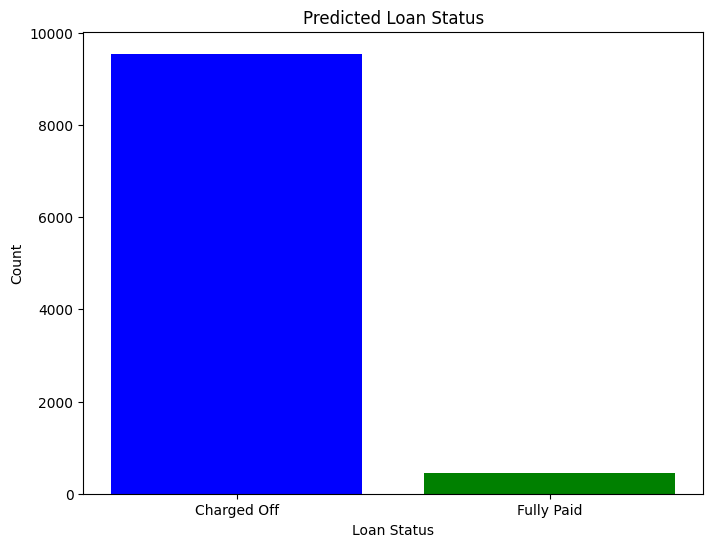

In [10]:
# Let us convert 1 and 0 into Fully Paid and Charged off respectively
y_pred = list(map(lambda x: 'Fully Paid' if x==1 else 'Charged Off' ,y_pred))
y_pred = np.array(y_pred)
testing['Loan Status'] = y_pred

# Create a bar chart
loan_status_counts = testing['Loan Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['blue', 'green'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Predicted Loan Status')
plt.show()